<a href="https://colab.research.google.com/github/JSEFERINO/Estadistica_Moderna/blob/main/102_DOE_3F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Diseño factorial completo tres factores: Usando ChatGPT**
## **a. Problema - Ejercicio 5 -16. Montgomery Diseño de Experimentos**
### **El porcentaje de la concentración de madera dura en la pulpa bruta, la presión de la cuba y el tiempo de cocción de la pulpa se investigan en cuanto a sus efectos sobre la resistencia del papel. Se seleccionan tres niveles de la concentración de madera dura, tres niveles en la presión y dos tiempos de cocción. Se lleva a cabo un experimento factorial con dos replicas, obteniéndose los siguientes datos:**

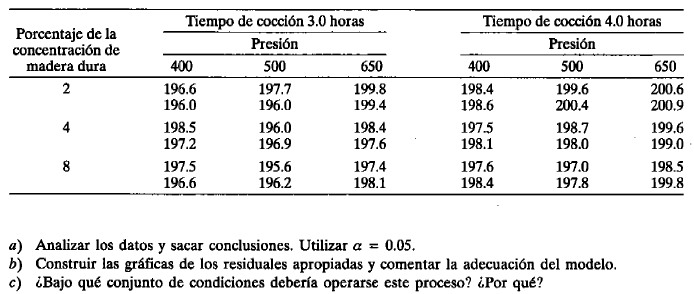

                                  df     sum_sq    mean_sq          F  \
C(TIEMPO)                        1.0  20.250000  20.250000  55.395137   
C(PRESION)                       2.0  19.373889   9.686944  26.499240   
C(MADERA)                        2.0   7.763889   3.881944  10.619301   
C(TIEMPO):C(PRESION)             2.0   2.195000   1.097500   3.002280   
C(TIEMPO):C(MADERA)              2.0   2.081667   1.040833   2.847264   
C(PRESION):C(MADERA)             4.0   6.091111   1.522778   4.165653   
C(TIEMPO):C(PRESION):C(MADERA)   4.0   1.973333   0.493333   1.349544   
Residual                        18.0   6.580000   0.365556        NaN   

                                      PR(>F)  
C(TIEMPO)                       6.745340e-07  
C(PRESION)                      4.327241e-06  
C(MADERA)                       8.995614e-04  
C(TIEMPO):C(PRESION)            7.495643e-02  
C(TIEMPO):C(MADERA)             8.425969e-02  
C(PRESION):C(MADERA)            1.462624e-02  
C(TIEMPO):C(P

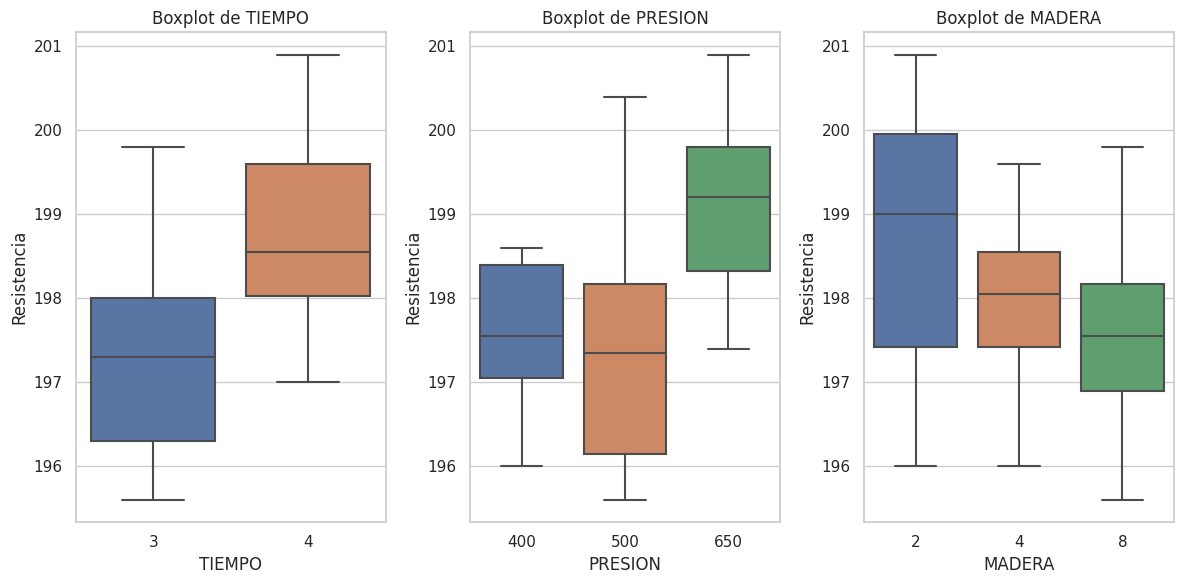

In [37]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un DataFrame con los datos proporcionados
data = {
    "TIEMPO": [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
               4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4],
    "PRESION": [400, 400, 400, 400, 400, 400,
                500, 500, 500, 500, 500, 500,
                650, 650, 650, 650, 650, 650,
                400, 400, 400, 400, 400, 400,
                500, 500, 500, 500, 500, 500,
                650, 650, 650, 650, 650, 650],
    "MADERA": [2, 2, 4, 4, 8, 8,
               2, 2, 4, 4, 8, 8,
               2, 2, 4, 4, 8, 8,
               2, 2, 4, 4, 8, 8,
               2, 2, 4, 4, 8, 8,
               2, 2, 4, 4, 8, 8],
    "Resistencia": [196.6, 196.0, 198.5, 197.2, 197.5, 196.6,
                    197.7, 196.0, 196.0, 196.9, 195.6, 196.2,
                    199.8, 199.4, 198.4, 197.6, 197.4, 198.1,
                    198.4, 198.6, 197.5, 198.1, 197.6, 198.4,
                    199.6, 200.4, 198.7, 198.0, 197.0, 197.8,
                    200.6, 200.9, 199.6, 199.0, 198.5, 199.8]
}

df = pd.DataFrame(data)

# Realizar el análisis de varianza multifactorial (ANOVA)
modelo = ols("Resistencia ~ C(TIEMPO) * C(PRESION) * C(MADERA)", data=df).fit()
anova_resultados = sm.stats.anova_lm(modelo, typ=1)

# Imprimir los resultados del ANOVA
print(anova_resultados)

# Generar gráficos de boxplot para cada factor
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
plt.subplot(131)
sns.boxplot(x="TIEMPO", y="Resistencia", data=df)
plt.title("Boxplot de TIEMPO")

plt.subplot(132)
sns.boxplot(x="PRESION", y="Resistencia", data=df)
plt.title("Boxplot de PRESION")

plt.subplot(133)
sns.boxplot(x="MADERA", y="Resistencia", data=df)
plt.title("Boxplot de MADERA")

plt.tight_layout()
plt.show()


## **b. Ampliando el Análisis**

In [38]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import shapiro, levene
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un DataFrame con los datos proporcionados
data = {
    "TIEMPO": [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
               4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4],
    "PRESION": [400, 400, 400, 400, 400, 400,
                500, 500, 500, 500, 500, 500,
                650, 650, 650, 650, 650, 650,
                400, 400, 400, 400, 400, 400,
                500, 500, 500, 500, 500, 500,
                650, 650, 650, 650, 650, 650],
    "MADERA": [2, 2, 4, 4, 8, 8,
               2, 2, 4, 4, 8, 8,
               2, 2, 4, 4, 8, 8,
               2, 2, 4, 4, 8, 8,
               2, 2, 4, 4, 8, 8,
               2, 2, 4, 4, 8, 8],
    "Resistencia": [196.6, 196.0, 198.5, 197.2, 197.5, 196.6,
                    197.7, 196.0, 196.0, 196.9, 195.6, 196.2,
                    199.8, 199.4, 198.4, 197.6, 197.4, 198.1,
                    198.4, 198.6, 197.5, 198.1, 197.6, 198.4,
                    199.6, 200.4, 198.7, 198.0, 197.0, 197.8,
                    200.6, 200.9, 199.6, 199.0, 198.5, 199.8]
}

df = pd.DataFrame(data)



## **c. Realizar el análisis de varianza multifactorial (ANOVA)**

In [39]:

# Realizar el análisis de varianza multifactorial (ANOVA)
modelo = ols("Resistencia ~ C(TIEMPO) * C(PRESION) * C(MADERA)", data=df).fit()
anova_resultados = sm.stats.anova_lm(modelo, typ=1)

# Imprimir los resultados del ANOVA
print("Resultados del ANOVA:")
print(anova_resultados)


Resultados del ANOVA:
                                  df     sum_sq    mean_sq          F  \
C(TIEMPO)                        1.0  20.250000  20.250000  55.395137   
C(PRESION)                       2.0  19.373889   9.686944  26.499240   
C(MADERA)                        2.0   7.763889   3.881944  10.619301   
C(TIEMPO):C(PRESION)             2.0   2.195000   1.097500   3.002280   
C(TIEMPO):C(MADERA)              2.0   2.081667   1.040833   2.847264   
C(PRESION):C(MADERA)             4.0   6.091111   1.522778   4.165653   
C(TIEMPO):C(PRESION):C(MADERA)   4.0   1.973333   0.493333   1.349544   
Residual                        18.0   6.580000   0.365556        NaN   

                                      PR(>F)  
C(TIEMPO)                       6.745340e-07  
C(PRESION)                      4.327241e-06  
C(MADERA)                       8.995614e-04  
C(TIEMPO):C(PRESION)            7.495643e-02  
C(TIEMPO):C(MADERA)             8.425969e-02  
C(PRESION):C(MADERA)            1.4626


## **d. Realizar la prueba de Tukey**

In [47]:
## **d. Realizar la prueba de Tukey**
tukey_result = pairwise_tukeyhsd(df['Resistencia'], df['TIEMPO'])
print("\nResultados de la prueba de Tukey:")
print(tukey_result)


Resultados de la prueba de Tukey:
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower  upper  reject
--------------------------------------------------
     3      4      1.5 0.0005 0.7116 2.2884   True
--------------------------------------------------


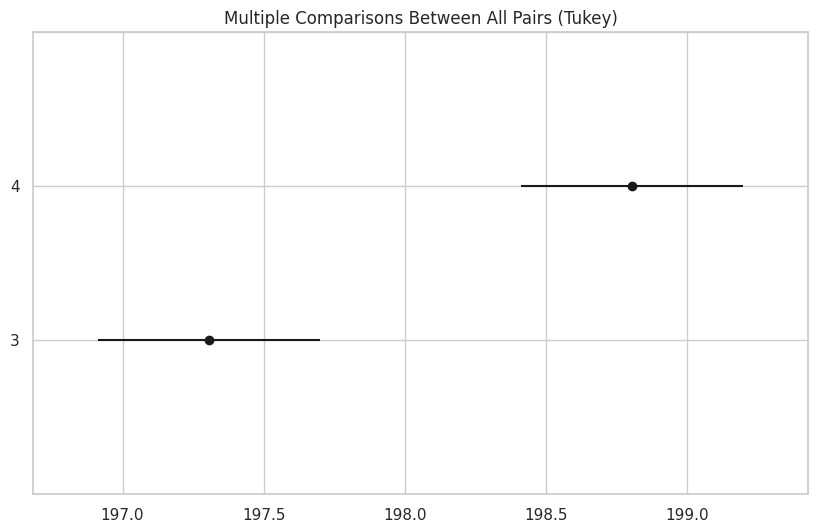

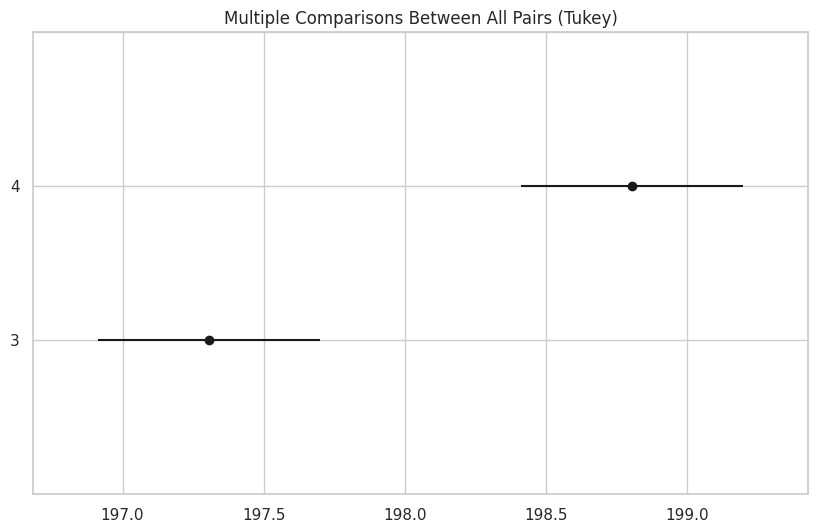

In [57]:
tukey_result.plot_simultaneous()

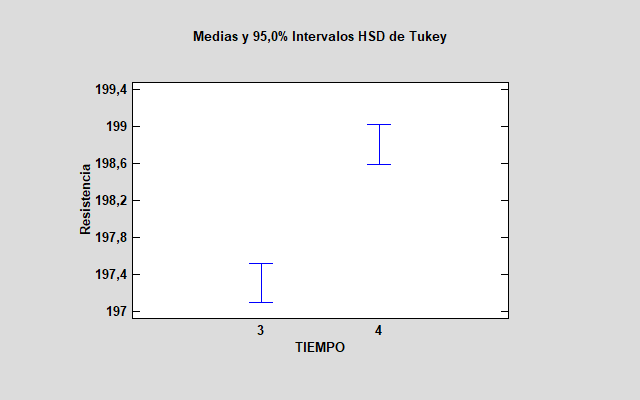

## **d. Realizar la prueba de Tukey**

In [48]:
## **d. Realizar la prueba de Tukey**
tukey_result2 = pairwise_tukeyhsd(df['Resistencia'], df['PRESION'])
print("\nResultados de la prueba de Tukey:")
print(tukey_result2)



Resultados de la prueba de Tukey:
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
   400    500  -0.0917 0.9807 -1.2864  1.103  False
   400    650   1.5083 0.0108  0.3136  2.703   True
   500    650      1.6 0.0066  0.4053 2.7947   True
---------------------------------------------------


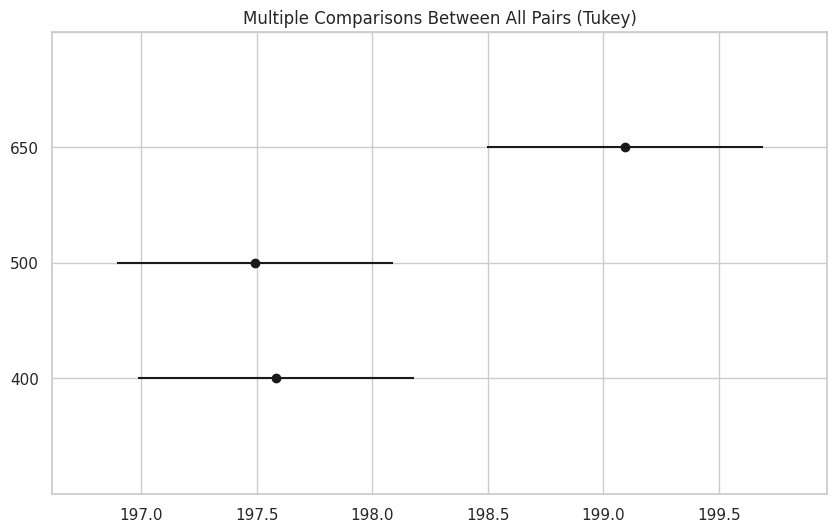

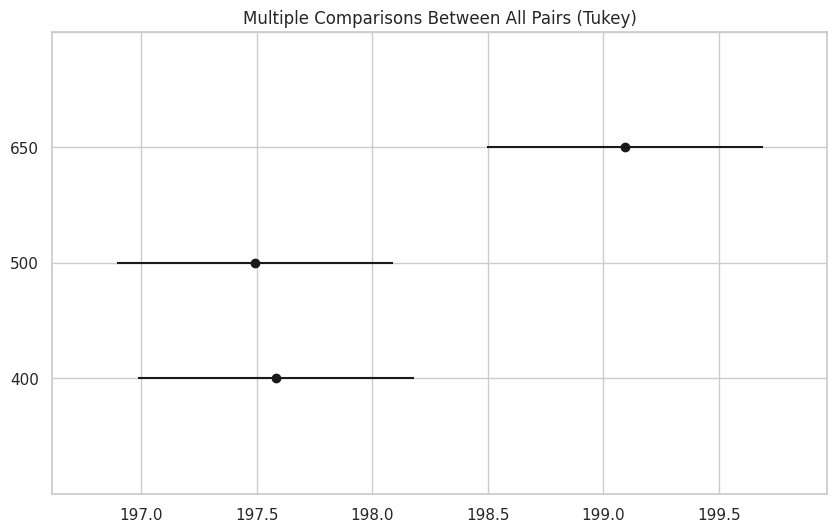

In [56]:
tukey_result2.plot_simultaneous()

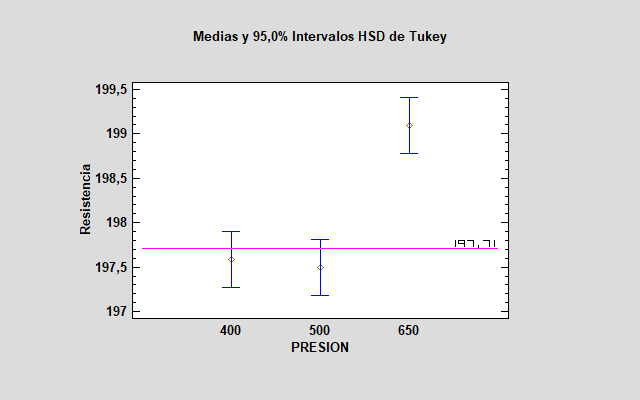

## **d. Realizar la prueba de Tukey**

In [52]:

## **d. Realizar la prueba de Tukey**
tukey_result3 = pairwise_tukeyhsd(df['Resistencia'], df['MADERA'])
print("\nResultados de la prueba de Tukey:")
print(tukey_result3)



Resultados de la prueba de Tukey:
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     2      4  -0.7083 0.4038 -2.0426  0.626  False
     2      8   -1.125  0.112 -2.4593 0.2093  False
     4      8  -0.4167  0.726  -1.751 0.9176  False
---------------------------------------------------


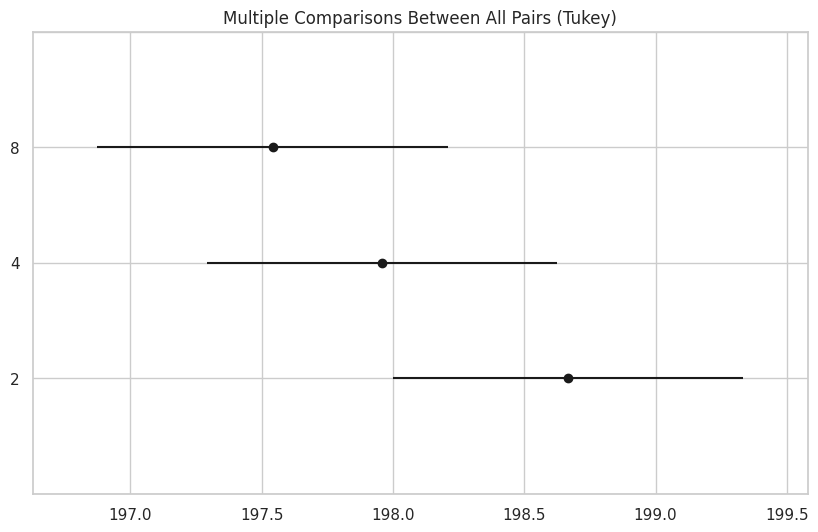

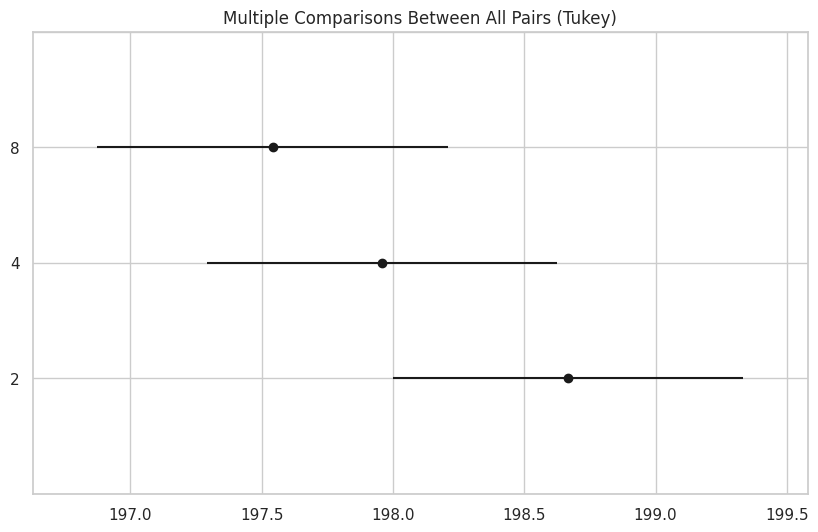

In [53]:
tukey_result3.plot_simultaneous()

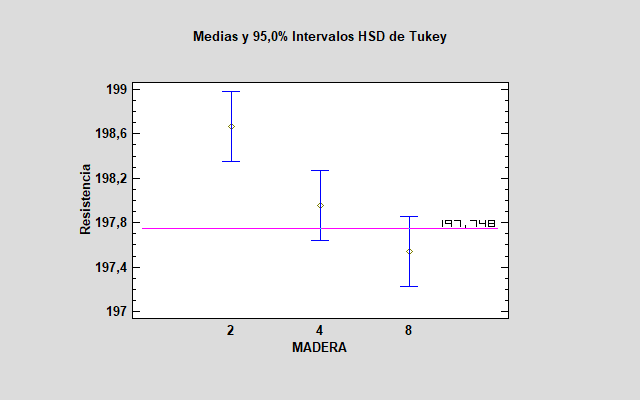


## **e. Generar gráficos de boxplot factoriales**

Text(0.5, 1.0, 'Boxplot de Resistencia por PRESION y MADERA')

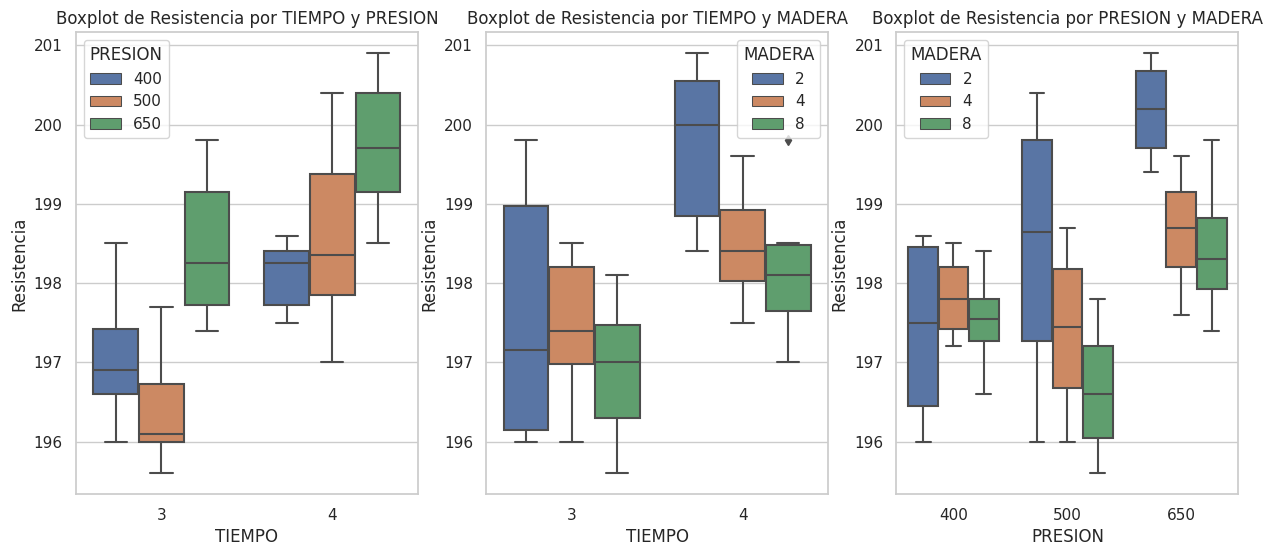

In [41]:


## **e. Generar gráficos de boxplot factoriales**
plt.figure(figsize=(15, 6))
plt.subplot(131)
sns.boxplot(x="TIEMPO", y="Resistencia", hue="PRESION", data=df)
plt.title("Boxplot de Resistencia por TIEMPO y PRESION")

plt.subplot(132)
sns.boxplot(x="TIEMPO", y="Resistencia", hue="MADERA", data=df)
plt.title("Boxplot de Resistencia por TIEMPO y MADERA")

plt.subplot(133)
sns.boxplot(x="PRESION", y="Resistencia", hue="MADERA", data=df)
plt.title("Boxplot de Resistencia por PRESION y MADERA")



## **f. Realizar la prueba de normalidad de Shapiro-Wilk**

In [42]:


## **f. Realizar la prueba de normalidad de Shapiro-Wilk**
for nivel in df['TIEMPO'].unique():
    data_nivel = df[df['TIEMPO'] == nivel]['Resistencia']
    _, p_value = shapiro(data_nivel)
    print(f"Shapiro-Wilk para TIEMPO {nivel}: p-value = {p_value}")



Shapiro-Wilk para TIEMPO 3: p-value = 0.4339628219604492
Shapiro-Wilk para TIEMPO 4: p-value = 0.5369641184806824


## **h.  Realizar la prueba de homogeneidad de varianza de Levene**

In [43]:

## **h.  Realizar la prueba de homogeneidad de varianza de Levene**
for nivel in df['TIEMPO'].unique():
    data_nivel = df[df['TIEMPO'] == nivel]['Resistencia']
    _, p_value = levene(data_nivel, df['PRESION'], df['MADERA'])
    print(f"Levene para TIEMPO {nivel}: p-value = {p_value}")


Levene para TIEMPO 3: p-value = 4.3295127293605007e-14
Levene para TIEMPO 4: p-value = 4.268458548335342e-14


## **i. Graficos de Interacción**

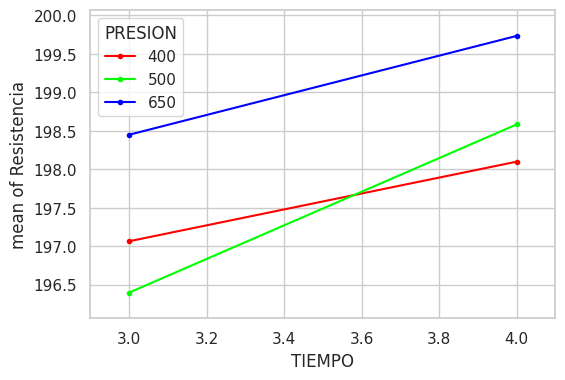

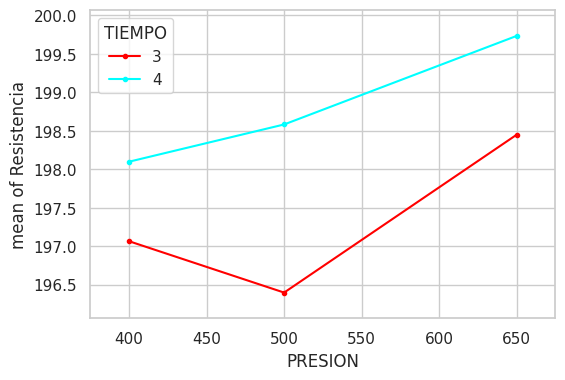

In [44]:
from statsmodels.graphics.factorplots import interaction_plot
fig, ax = plt.subplots(figsize=(6, 4))
fig = interaction_plot(
    x        = df.TIEMPO,
    trace    = df.PRESION,
    response = df.Resistencia,
    ax       = ax,
)
fig, ax = plt.subplots(figsize=(6, 4))
fig = interaction_plot(
    x        = df.PRESION,
    trace    = df.TIEMPO,
    response = df.Resistencia,
    ax       = ax,
)



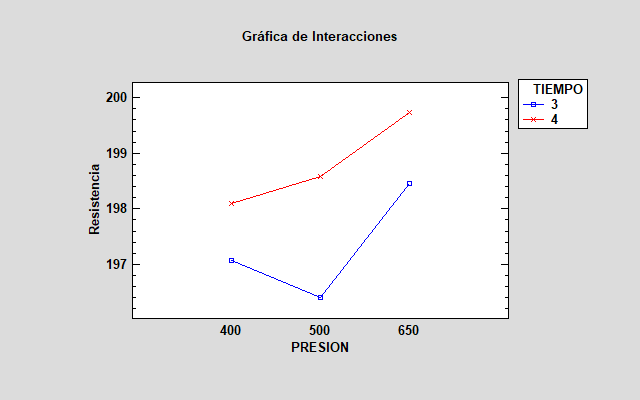

## **j. Graficos de Interacción**

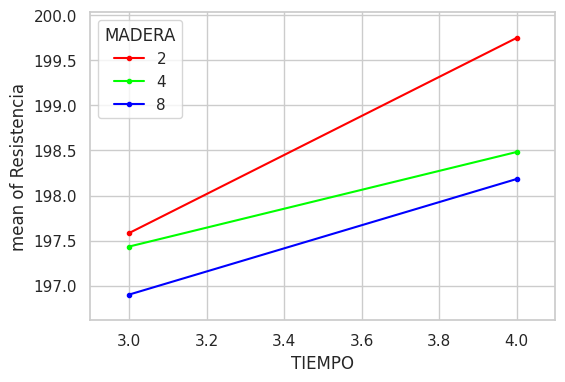

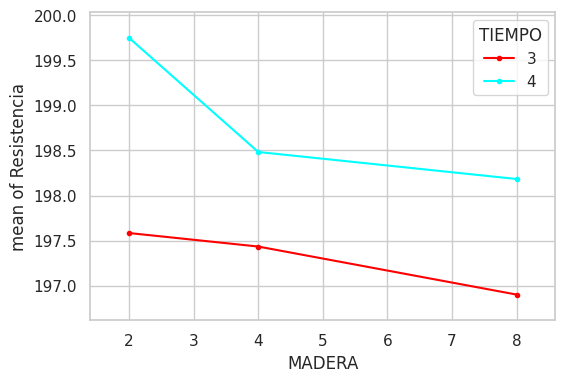

In [45]:

fig, ax = plt.subplots(figsize=(6, 4))
fig = interaction_plot(
    x        = df.TIEMPO,
    trace    = df.MADERA,
    response = df.Resistencia,
    ax       = ax,
)

fig, ax = plt.subplots(figsize=(6, 4))
fig = interaction_plot(
    x        = df.MADERA,
    trace    = df.TIEMPO,
    response = df.Resistencia,
    ax       = ax,
)

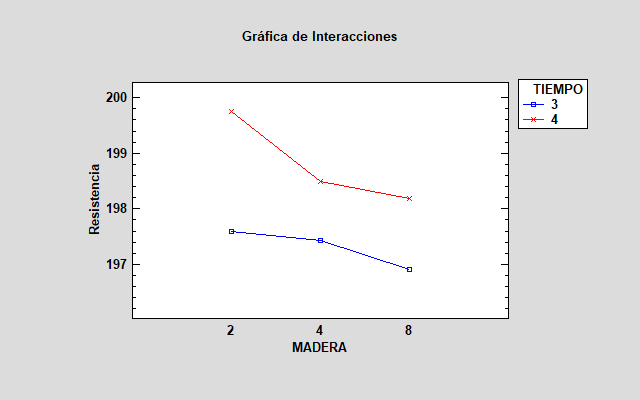

## **k. Graficos de Interacción**

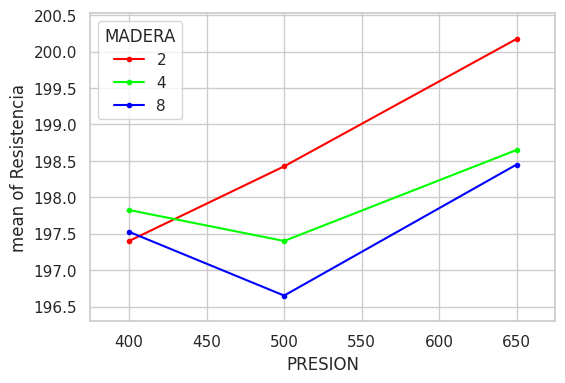

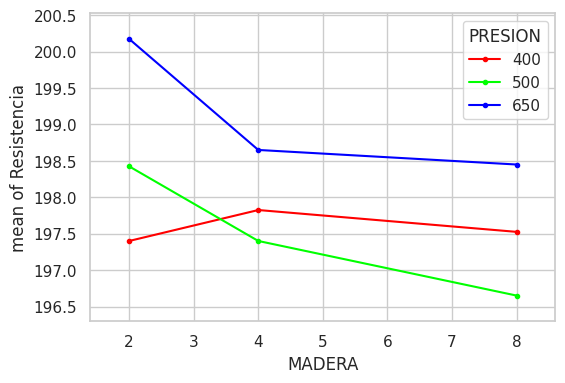

In [46]:


fig, ax = plt.subplots(figsize=(6, 4))
fig = interaction_plot(
    x        = df.PRESION,
    trace    = df.MADERA,
    response = df.Resistencia,
    ax       = ax,
)


fig, ax = plt.subplots(figsize=(6, 4))
fig = interaction_plot(
    x        = df.MADERA,
    trace    = df.PRESION,
    response = df.Resistencia,
    ax       = ax,
)

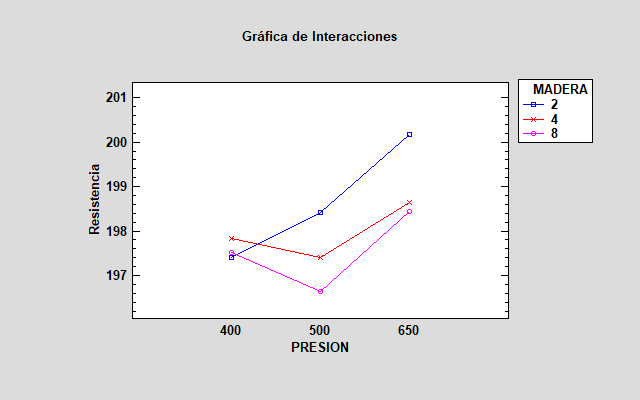